In [1]:
#!pip install nibabel


In [1]:

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mp

In [23]:
pid = "R0000317"
path = "/Users/yoonhonam/Desktop/glioma_segmentation_results/"+pid
imgname = "data_t2.nii.gz"
segname = "net_input_"+pid+".nii.gz"
#totalname = "t2_total.nii"
segname_new = "net_mask_new.nii.gz" # 

In [24]:
t2 = nib.load(path+'/'+imgname)
edm = nib.load(path+'/'+segname)
#total = nib.load(path+'/'+totalname)

In [25]:
vs = t2.header.get_zooms()
Ne = (np.round(2/vs[0])).astype(int) # 3mm 
Nd = (np.round(10/vs[0])).astype(int) # distance
Nd


10

size of t2 image =  (240, 240, 155)
size of msk image =  (240, 240, 155)
slice # of largest mask: 47


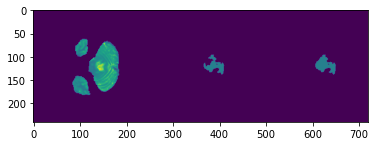

In [34]:
t2img = t2.get_fdata()
t2img = (t2img-np.min(t2img))/(np.max(t2img)-np.min(t2img))
print('size of t2 image = ',t2img.shape)
edmimg = edm.get_fdata()
print('size of msk image = ',edmimg.shape)
totalimg = edm.get_fdata()
totalimg = (totalimg>0).astype(int)
edmimg = (edmimg==2).astype(int)

zzz=np.sum(np.sum(edmimg,axis=1),axis=0)
zmax=np.argmax(zzz)
print('slice # of largest mask:',zmax)
n_slice = zmax # slice number to be displayed
plt.imshow(np.concatenate((t2img[:,:,n_slice]*3,edmimg[:,:,n_slice],totalimg[:,:,n_slice]),axis=1))

In [35]:
NX,NY,NZ=edmimg.shape
NZ
edmimg_new=np.zeros(edmimg.shape)
# for 2d erosion/dilation (for conventional 2D MR images)
for nz in range(NZ):
    mass = (totalimg[:,:,nz]-edmimg[:,:,nz])>0.5
    mass = mp.binary_opening(mass,selem=mp.disk(Ne))
    edema = edmimg[:,:,nz]>0.5
    edmimg_new[:,:,nz]=mp.binary_opening(np.multiply(mp.binary_dilation(mass,selem=mp.disk(Nd)),edema),selem=mp.disk(Ne))

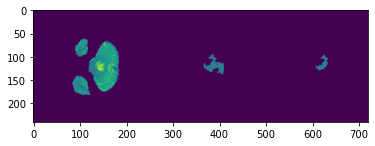

In [36]:
n_slice = zmax # slice number to be displayed
plt.imshow(np.concatenate((t2img[:,:,n_slice]*3,edmimg[:,:,n_slice],edmimg_new[:,:,n_slice]),axis=1))

In [10]:
edmimg_new = ((edmimg_new.astype(int))>0.5).astype(int)
edm_new=nib.Nifti1Image(edmimg_new,edm.affine,edm.header)
nib.save(edm_new,path+'/'+segname_new)